# Modelling Strategie
We looking for solve a classification problem like:\
*What range a goal would belongs ?*
- Target = **class**
- Features = **goal averages for team at home and away**
- Model = **Random Forest Classifier**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import random

### Feature Engineering

In [2]:
path = Path.cwd().parent.parent / 'data' / '2022_23' / 'results' / 'ligue1.csv'
df = pd.read_csv(path, parse_dates=True, index_col='date_time')
df.head()

,journée,home_team,away_team,1st_home_team_goal,1st_away_team_goal,1st_total_goal,2nd_home_team_goal,2nd_away_team_goal,2nd_total_goal,total_home_team_goal,total_away_team_goal,global
date_time,,,,,,,,,,,,
2023-06-03 19:00:00,38,AC Ajaccio,Marseille,0,0,0,1,0,1,1,0,1
2023-06-03 19:00:00,38,Nice,Lyon,3,1,4,0,0,0,3,1,4
2023-06-03 19:00:00,38,Troyes,Lille,0,0,0,1,1,2,1,1,2
2023-06-03 19:00:00,38,Reims,Montpellier,1,0,1,0,3,3,1,3,4
2023-06-03 19:00:00,38,PSG,Clermont,2,2,4,0,1,1,2,3,5


In [3]:
def avg_per_match():
    """This function will calculate for each team
    the average of goal after each journée
    """
    data = df.copy()
    data = data.sort_values(by='journée', ascending=True)
    data.drop(['1st_home_team_goal', '1st_away_team_goal',
               '1st_total_goal', '2nd_home_team_goal', '2nd_away_team_goal',
               '2nd_total_goal'], axis=1, inplace=True)
    for row in data.iterrows():
        at_home = data[data['home_team']==data['home_team']]
        at_away = data[data['away_team']==data['away_team']]
        data['ht_scored_avg'] = at_home.groupby('home_team')['total_home_team_goal'].transform(lambda x: x.expanding().mean().shift())
        data['ht_conceded_avg'] = at_home.groupby('home_team')['total_away_team_goal'].transform(lambda x: x.expanding().mean().shift())
        data['at_scored_avg'] = at_away.groupby('away_team')['total_away_team_goal'].transform(lambda x: x.expanding().mean().shift())
        data['at_conceded_avg'] = at_away.groupby('away_team')['total_home_team_goal'].transform(lambda x: x.expanding().mean().shift())
        data['ht_global_avg'] = at_home.groupby('home_team')['global'].transform(lambda x: x.expanding().mean().shift())
        data['at_global_avg'] = at_away.groupby('away_team')['global'].transform(lambda x: x.expanding().mean().shift())
    return data

In [4]:
data = avg_per_match()
data.tail(10)

,journée,home_team,away_team,total_home_team_goal,total_away_team_goal,global,ht_scored_avg,ht_conceded_avg,at_scored_avg,at_conceded_avg,ht_global_avg,at_global_avg
date_time,,,,,,,,,,,,
2023-06-03 19:00:00,38,Monaco,Toulouse,1,2,3,2.000000,1.722222,1.222222,1.611111,3.722222,2.833333
2023-06-03 19:00:00,38,Brest,Rennes,1,2,3,1.277778,1.333333,1.333333,1.333333,2.611111,2.666667
2023-06-03 19:00:00,38,Lorient,Strasbourg,2,1,3,1.333333,1.111111,1.388889,1.722222,2.444444,3.111111
2023-06-03 19:00:00,38,Nantes,Angers,1,0,1,1.055556,1.444444,0.722222,2.444444,2.500000,3.166667
2023-06-03 19:00:00,38,Auxerre,Lens,1,3,4,0.944444,1.388889,1.333333,0.833333,2.333333,2.166667
2023-06-03 19:00:00,38,PSG,Clermont,2,3,5,2.388889,1.222222,1.222222,1.055556,3.611111,2.277778
2023-06-03 19:00:00,38,Reims,Montpellier,1,3,4,1.500000,1.111111,1.833333,1.777778,2.611111,3.611111
2023-06-03 19:00:00,38,Troyes,Lille,1,1,2,1.000000,1.611111,1.333333,1.000000,2.611111,2.333333
2023-06-03 19:00:00,38,Nice,Lyon,3,1,4,1.166667,0.944444,1.611111,1.388889,2.111111,3.000000


### Modelling

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 380 entries, 2022-08-05 19:00:00 to 2023-06-03 19:00:00
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   journée               380 non-null    int64  
 1   home_team             380 non-null    object 
 2   away_team             380 non-null    object 
 3   total_home_team_goal  380 non-null    int64  
 4   total_away_team_goal  380 non-null    int64  
 5   global                380 non-null    int64  
 6   ht_scored_avg         360 non-null    float64
 7   ht_conceded_avg       360 non-null    float64
 8   at_scored_avg         360 non-null    float64
 9   at_conceded_avg       360 non-null    float64
 10  ht_global_avg         360 non-null    float64
 11  at_global_avg         360 non-null    float64
dtypes: float64(6), int64(4), object(2)
memory usage: 38.6+ KB


In [7]:
# we started to drop columns which contains missing values
# and non reliable columns
dataset = data[data['journée'] > 2]

In [8]:
labels_name = ['under 2,5', 'over 2,5']
dataset['class'] = pd.cut(x=dataset['total_home_team_goal'], bins=[min(dataset['total_home_team_goal']), 2, max(dataset['total_home_team_goal'])],
              labels=labels_name, include_lowest=True)

/tmp/ipykernel_4700/2261343204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['class'] = pd.cut(x=dataset['total_home_team_goal'], bins=[min(dataset['total_home_team_goal']), 2, max(dataset['total_home_team_goal'])],


In [9]:
encod = {
    'under 2,5': 0,
    'over 2,5': 1,
}
dataset['class'] = dataset['class'].map(encod)

/tmp/ipykernel_4700/1410961397.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['class'] = dataset['class'].map(encod)


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 360 entries, 2022-08-21 18:45:00 to 2023-06-03 19:00:00
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   journée               360 non-null    int64   
 1   home_team             360 non-null    object  
 2   away_team             360 non-null    object  
 3   total_home_team_goal  360 non-null    int64   
 4   total_away_team_goal  360 non-null    int64   
 5   global                360 non-null    int64   
 6   ht_scored_avg         360 non-null    float64 
 7   ht_conceded_avg       360 non-null    float64 
 8   at_scored_avg         360 non-null    float64 
 9   at_conceded_avg       360 non-null    float64 
 10  ht_global_avg         360 non-null    float64 
 11  at_global_avg         360 non-null    float64 
 12  class                 360 non-null    category
dtypes: category(1), float64(6), int64(4), object(2)
memory usage: 37.0+ KB


In [12]:
y = dataset['class']
X = dataset[['ht_scored_avg', 'at_conceded_avg']]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
parameter = [{'n_estimators': range(1, 15),
             'max_depth':range(1, 15)}]
grid = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=parameter, 
                    scoring='accuracy', cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid=[{'max_depth': range(1, 15),
                          'n_estimators': range(1, 15)}],
             scoring='accuracy')

In [14]:
print(grid.best_estimator_)
print(grid.best_score_)

RandomForestClassifier(max_depth=5, n_estimators=7, random_state=0)
0.8332549019607842


In [15]:
model = grid.best_estimator_
print(f"score {model.__class__.__name__}: {model.score(x_test, y_test)}")
print(confusion_matrix(y_test, model.predict(x_test)))

score RandomForestClassifier: 0.7407407407407407
[[79  6]
 [22  1]]


In [16]:
N, train_score, val_score = learning_curve(
    model, x_train, y_train, train_sizes= np.linspace(0.1, 1.0, 10), cv=5
)

[ 20  40  60  80 100 120 140 160 180 201]


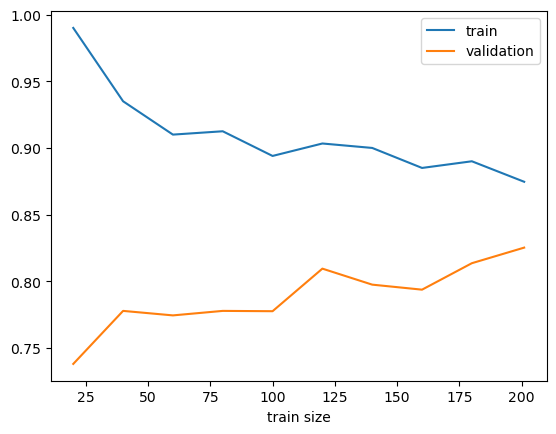

In [17]:
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train size')
plt.legend()